In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
from pandas import *
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = base.classes.measurement
Station = base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(recent_date)

('2017-08-23',)


In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 
recent_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Calculate the date one year from the last date in data set.   
# Perform a query to retrieve the data and precipitation scores
precip_data = session.query(Measurement.date, func.max(Measurement.prcp)).\
    filter(Measurement.date >= recent_date).\
    group_by(Measurement.date).\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(precip_data, columns=['date', 'prcp'])

# Sort the dataframe by date
precip_df.set_index('date', inplace=True )
precip_df.head()

,prcp
date,
2016-08-23,1.79
2016-08-24,2.28
2016-08-25,0.21
2016-08-26,0.04
2016-08-27,0.18


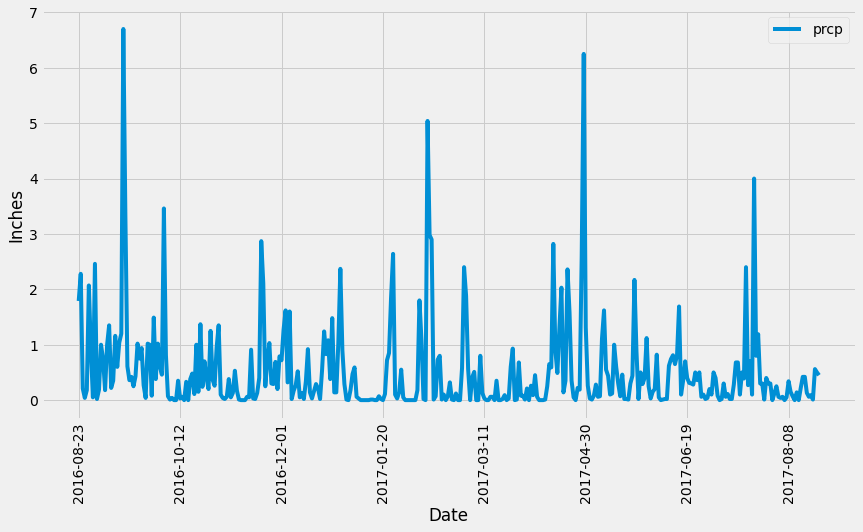

In [11]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.rcParams['figure.figsize']=(13,7)
precip_df.plot(rot=90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.legend()
plt.show()

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_data_all = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= recent_date).\
    order_by(Measurement.date).all()
precip_data_all_df = pd.DataFrame(precip_data_all, columns=['date', 'prcp'])
precip_data_all_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(Station).count()
print(f'There are a total of {total_stations} stations')

There are a total of 9 stations


In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.id)).group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()
print(most_active_stations)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_tob = session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').group_by(Measurement.station).all()
print(most_active_tob)

[('USC00519281', 54.0, 85.0, 71.66378066378067)]


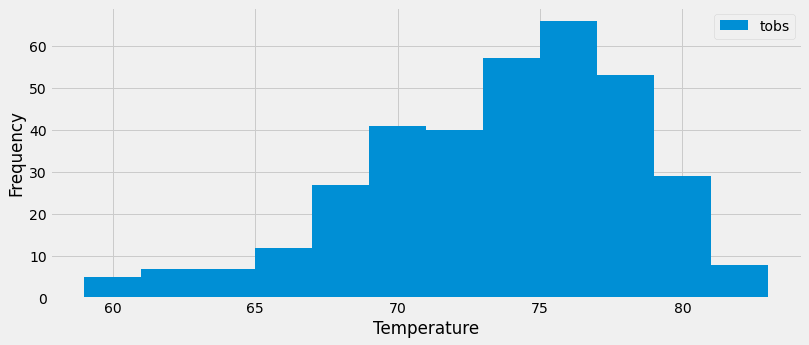

In [16]:
# Using the most active station id (USC00519281)
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_obs_data = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= recent_date).\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
temp_obs_df = pd.DataFrame(temp_obs_data, columns=['date', 'tobs'])

# Sort the dataframe by date
temp_obs_df.set_index('date', inplace=True )

# Use Pandas Plotting with Matplotlib to plot the data
# Plot the results as a histogram with bins=12.

plt.rcParams['figure.figsize']=(12,5)
plt.hist(temp_obs_df['tobs'], bins=12, label="tobs")

plt.legend()
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Close session

In [17]:
# Close Session
session.close()